<a href="https://colab.research.google.com/github/Fazzaaaa/smartVision_and_imageProcessing/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PRAKTIKUM**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


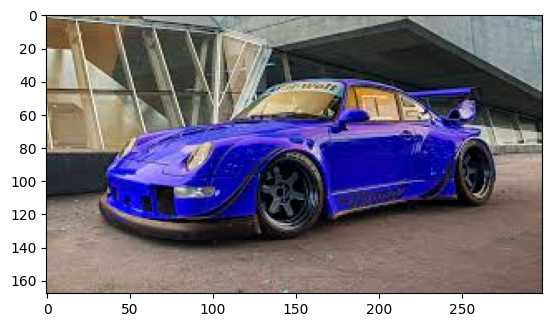

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import skimage as io

url = '/content/drive/MyDrive/RWB.jpeg'
img = cv.imread(url)
plt.imshow(img)

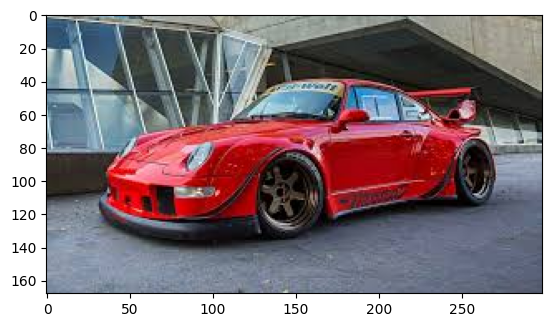

In [ ]:
img2 = img
img3 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img3)

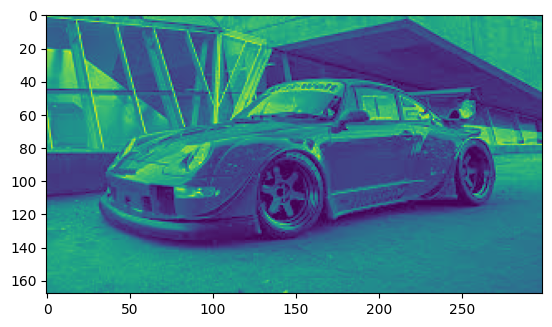

In [ ]:
img_grey = cv.imread(url, cv.IMREAD_GRAYSCALE)
plt.imshow(img_grey)

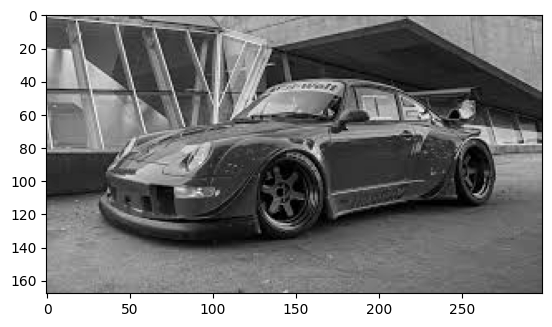

In [ ]:
plt.imshow(img_grey, cmap='gray')

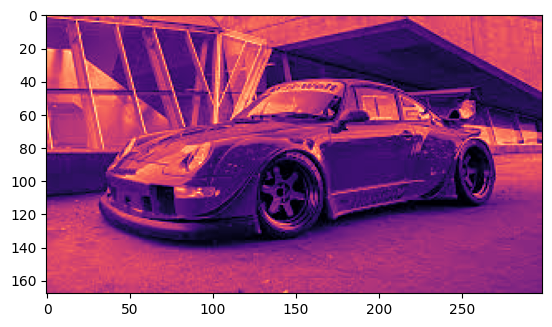

In [ ]:
plt.imshow(img_grey, cmap='magma')

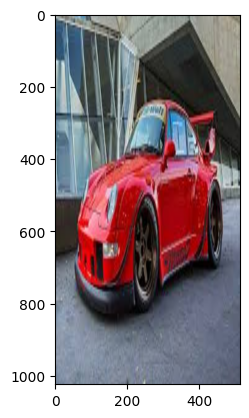

In [ ]:
img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512, 1024))
plt.imshow(img4)

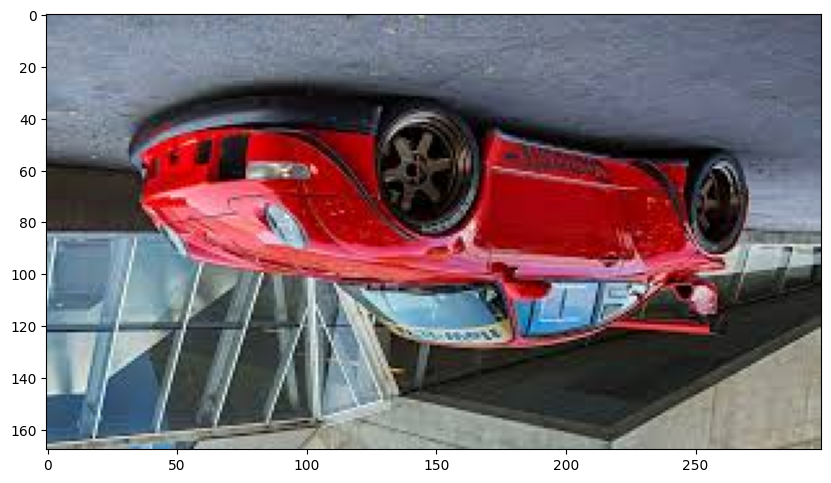

In [ ]:
img5 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(img5)

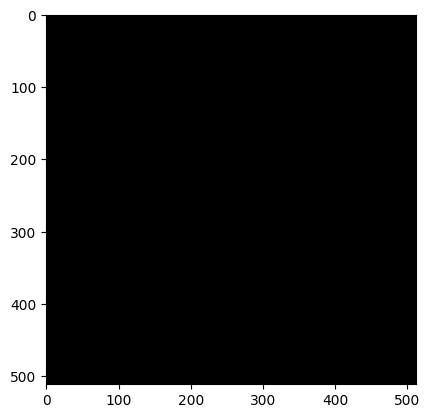

In [ ]:
black_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)
plt.imshow(black_img)

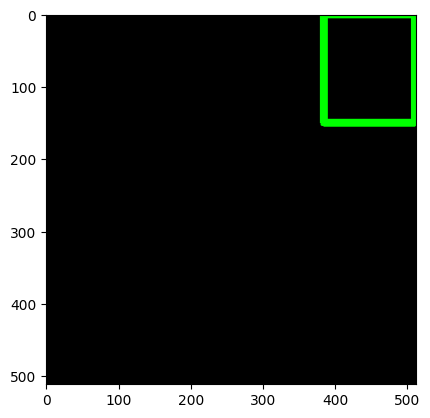

In [ ]:
cv.rectangle(black_img, pt1=(384, 0), pt2=(510, 150), color=(0, 255, 0), thickness=10)
plt.imshow(black_img)

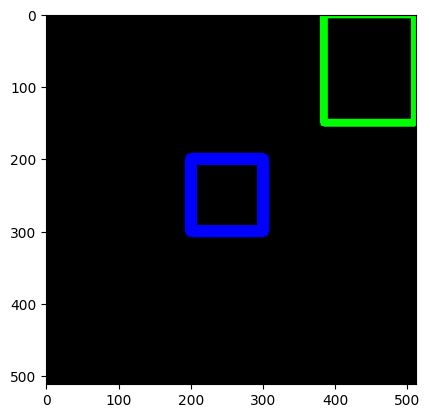

In [ ]:
cv.rectangle(black_img, pt1=(200, 200), pt2=(300, 300), color=(0, 0, 255), thickness=15)
plt.imshow(black_img)

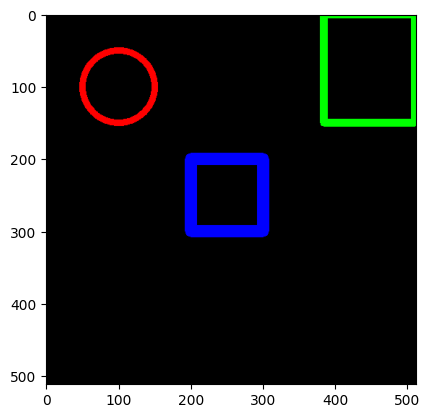

In [ ]:
cv.circle(black_img, center=(100, 100), radius=50, color=(255, 0, 0), thickness=8)
plt.imshow(black_img)

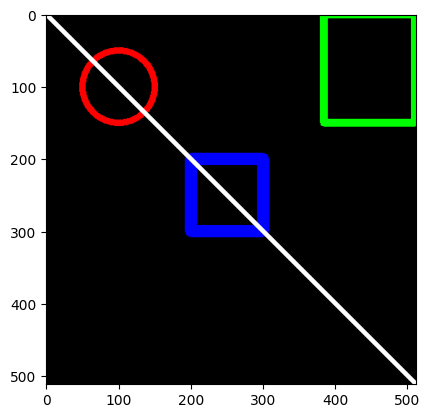

In [ ]:
cv.line(black_img, pt1=(0, 0), pt2=(512, 512), color=(255, 255, 255), thickness=5)
plt.imshow(black_img)

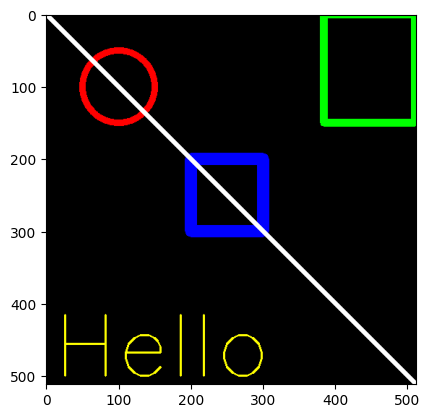

In [ ]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img, text='Hello', org=(10, 500), fontFace=font, fontScale=4, color=(255, 255, 0), thickness=2, lineType=cv.LINE_AA)
plt.imshow(black_img)

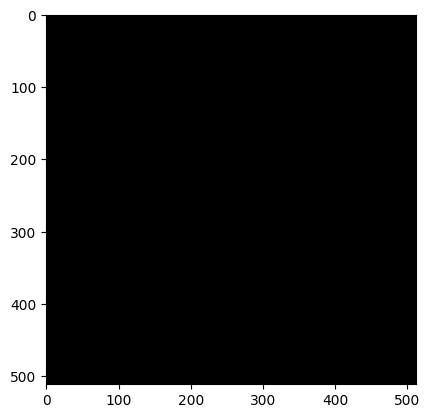

In [ ]:
black_img2 = np.zeros(shape=(512, 512, 3), dtype=np.int32)
plt.imshow(black_img2)

In [ ]:
vertices = np.array([[100, 300], [200, 200], [400, 300], [200, 400]], dtype=np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

In [ ]:
pts = vertices.reshape((-1, 1, 2))
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

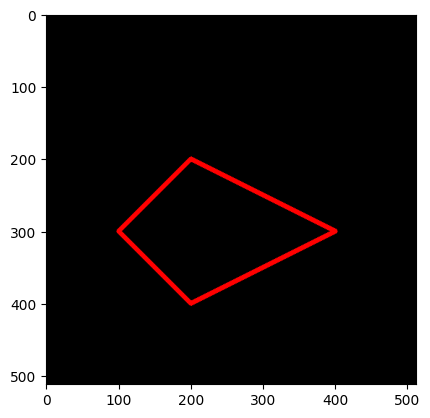

In [ ]:
cv.polylines(black_img2, [pts], isClosed=True, color=(255, 0, 0), thickness=5)
plt.imshow(black_img2)

## **TUGAS**

**Jawaban Soal Nomor 1**

Dengan menggunakan **figsize**, ukuran gambar dalam **inci** yang diatur akan berubah, tetapi **resolusi pixel** tetap tergantung pada DPI (dots per inch). Jika DPI tidak berubah, jumlah piksel pada gambar tetap sama.

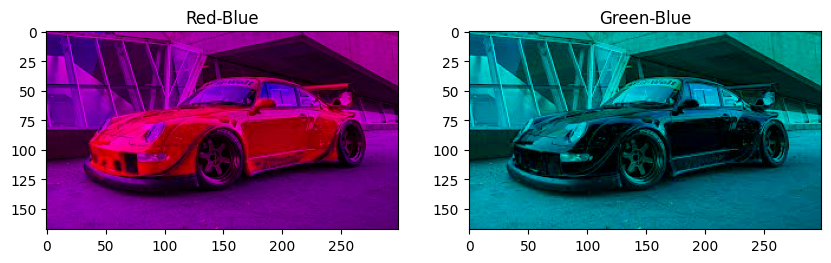

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
# Mengkonversi img menjadi RGB
imgTugas = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Red-Blue (Green channel set to 0)
img_rb = imgTugas.copy()
img_rb[:, :, 1] = 0

# Green-Blue (Red channel set to 0)
img_gb = imgTugas.copy()
img_gb[:, :, 0] = 0

plt.figure(figsize=(10, 5))

# Display Red-Blue image
plt.subplot(1, 2, 1)
plt.imshow(img_rb)
plt.title('Red-Blue')
plt.axis('on')

# Display Green-Blue image
plt.subplot(1, 2, 2)
plt.imshow(img_gb)
plt.title('Green-Blue')
plt.axis('on')

plt.show()



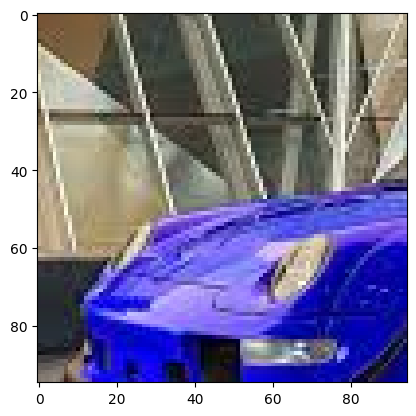

In [ ]:
img_line= img[20:115,25:120]
plt.imshow(img_line)

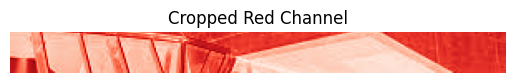

In [ ]:
cropped_red_channel = img[5:30, :, 2]
plt.imshow(cropped_red_channel, cmap='Reds')
plt.title('Cropped Red Channel')
plt.axis('off')
plt.show()

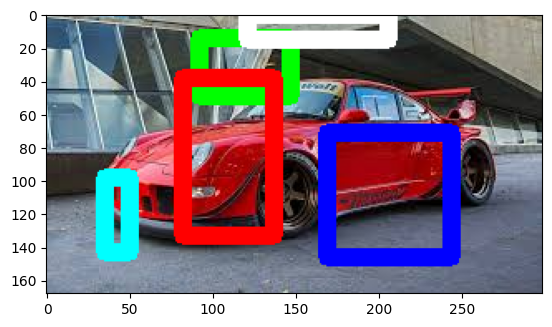

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random

# Fungsi untuk menghasilkan posisi acak
def random_position(img_width, img_height, box_width, box_height):
    x1 = random.randint(0, max(0, img_width - box_width)) # Ensure x1 is within valid range
    y1 = random.randint(0, max(0, img_height - box_height)) # Ensure y1 is within valid range
    x2 = x1 + box_width
    y2 = y1 + box_height
    return (x1, y1), (x2, y2)

def draw_rectangle(img, position, color, thickness):
    cv.rectangle(img, pt1=position[0], pt2=position[1], color=color, thickness=thickness)

# Load the image here. Make sure the path is correct
img = cv.imread('/content/drive/MyDrive/RWB.jpeg') # Replace with the actual path

# Check if the image loaded correctly
if img is None:
    print('Could not open or find the image')
else:
    img_ktk = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    img_height, img_width, _ = img.shape

    box_sizes = [(15, 45), (55, 35), (85, 15), (55, 95), (75, 75)]

    rectangles = [
        (random_position(img_width, img_height, *box_sizes[0]), (0, 255, 255)),
        (random_position(img_width, img_height, *box_sizes[1]), (0, 255, 0)),
        (random_position(img_width, img_height, *box_sizes[2]), (255, 255, 255)),
        (random_position(img_width, img_height, *box_sizes[3]), (255, 0, 0)),
        (random_position(img_width, img_height, *box_sizes[4]), (0, 0, 255))
    ]

    for position, color in rectangles:
        # Ensure the box fits within the image boundaries
        position = ((max(0, position[0][0]), max(0, position[0][1])), (min(img_width, position[1][0]), min(img_height, position[1][1])))
        draw_rectangle(img_ktk, position, color, thickness=10)

    plt.imshow(img_ktk)
    plt.show()

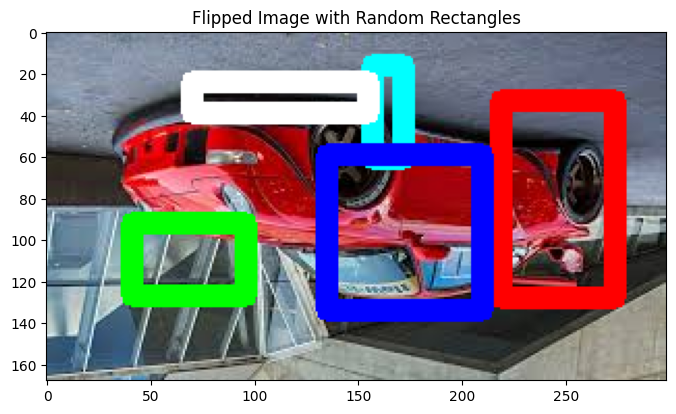

In [ ]:
def random_position(img_width, img_height, box_width, box_height):
    x1 = random.randint(0, img_width - box_width)
    y1 = random.randint(0, img_height - box_height)
    x2 = x1 + box_width
    y2 = y1 + box_height
    return (x1, y1), (x2, y2)

def draw_rectangle(img, position, color, thickness):
    cv.rectangle(img, pt1=position[0], pt2=position[1], color=color, thickness=thickness)

img_ktk = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_height, img_width, _ = img.shape

box_sizes = [(15, 45), (55, 35), (85, 15), (55, 95), (75, 75)]

rectangles = [
    (random_position(img_width, img_height, *box_sizes[0]), (0, 255, 255)),
    (random_position(img_width, img_height, *box_sizes[1]), (0, 255, 0)),
    (random_position(img_width, img_height, *box_sizes[2]), (255, 255, 255)),
    (random_position(img_width, img_height, *box_sizes[3]), (255, 0, 0)),
    (random_position(img_width, img_height, *box_sizes[4]), (0, 0, 255))
]

for position, color in rectangles:
    draw_rectangle(img_ktk, position, color, thickness=10)

# Membalikkan gambar secara vertikal
img_flipped = cv.flip(img_ktk, 0)  # 0 berarti flip secara vertikal

plt.figure(figsize=(8, 8))
plt.imshow(img_flipped)
plt.title('Flipped Image with Random Rectangles')
plt.axis('on')
plt.show()

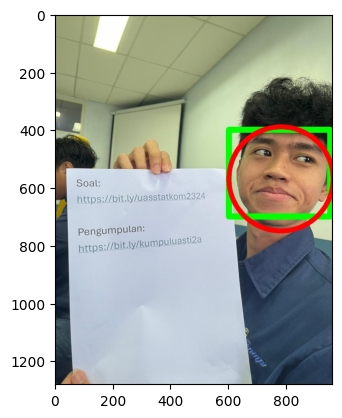

In [ ]:
image_face = cv.imread('/content/drive/MyDrive/Toro.jpg')
image_face = cv.cvtColor(image_face, cv.COLOR_BGR2RGB)

# Gambar rectangle pada posisi wajah
cv.rectangle(image_face, pt1=(600, 400), pt2=(950, 700), color=(0, 255, 0), thickness=20)

# Gambar lingkaran pada posisi wajah yang lebih tepat
cv.circle(image_face, center=(780, 570), radius=180, color=(255, 0, 0), thickness=15)

# Tampilkan gambar
plt.imshow(image_face)
plt.axis('on')
plt.show()

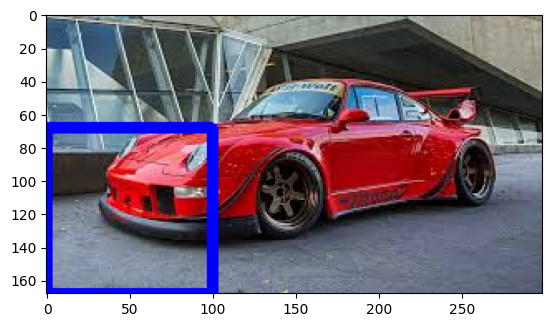

In [ ]:
img_f = cv.imread('/content/drive/MyDrive/RWB.jpeg')
plt.imshow(img_f)

cv.rectangle(img_f, pt1=(0, img_f.shape[0] - 100), pt2=(100, img_f.shape[0]), color=(255, 0, 0), thickness=5)
plt.imshow(cv.cvtColor(img_f, cv.COLOR_BGR2RGB))
plt.show()

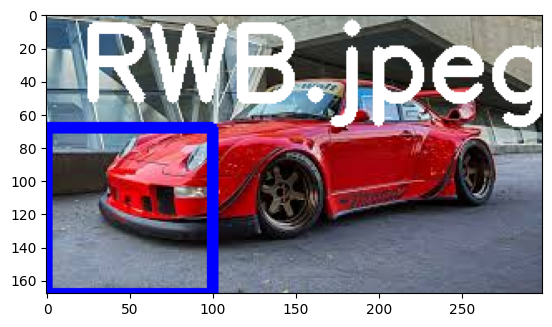

In [ ]:
img_f = cv.imread('/content/drive/MyDrive/RWB.jpeg')
plt.imshow(img_f)

cv.putText(img_f, "RWB.jpeg", (20, 50), cv.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 5)
cv.rectangle(img_f, pt1=(0, img_f.shape[0] - 100), pt2=(100, img_f.shape[0]), color=(255, 0, 0), thickness=5)
plt.imshow(cv.cvtColor(img_f, cv.COLOR_BGR2RGB))
plt.show()

## **TUGAS KELOMPOK**

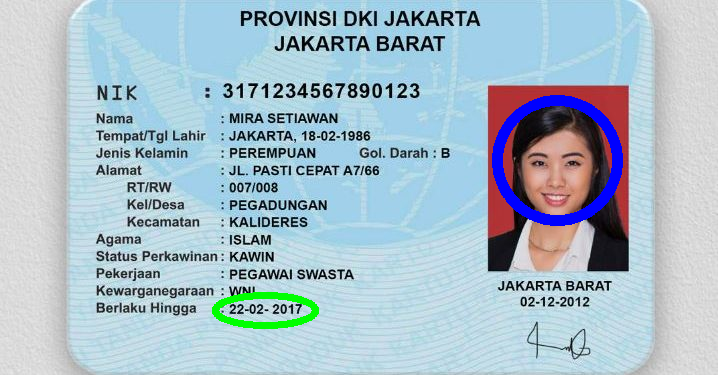

In [ ]:
from skimage import io

# Load the image
id_card = io.imread("https://umsu.ac.id/artikel/wp-content/uploads/2023/11/cara-mudah-cek-ktp-asli-atau-palsu-718x375.jpeg")
id_card = cv.cvtColor(id_card, cv.COLOR_BGR2RGB)

# Check if the image is loaded successfully
if id_card is None:
    print("Error: Could not load the image.")
else:
    cv.circle(id_card, center=(557, 160), radius=60, color=(255, 0, 0), thickness=10)  # Foto
    cv.ellipse(id_card, center=(265, 310), axes=(50, 15), angle=0, startAngle=0, endAngle=360, color=(0, 255, 0), thickness=5) # Berlaku Hingga
    cv2_imshow(id_card)